Reconhecimento de Padrões

Lista 1: Regressão Linear

Vinícius Peixoto Chagas

# Imports

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from IPython.display import Image, display
plt.style.use('dark_background')

In [44]:
df = pd.read_csv("content/artificial1d.csv", header=None)
df.columns = ['x', 'y']
df.head()

,x,y
0,-1.000000,-2.082017
1,-0.931034,-1.326980
2,-0.862069,-1.105598
3,-0.793103,-0.873946
4,-0.724138,-0.285027


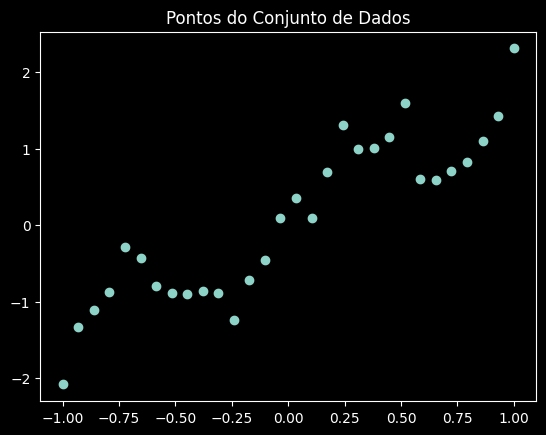

In [45]:
plt.scatter(df['x'], df['y'])
plt.title('Pontos do Conjunto de Dados')


plt.show()

# Models

## Gradient Descent

In [46]:
class GradientDescent:
    def __init__(self, alpha=0.1, epochs=10, output_dir=None):
        self.alpha = alpha
        self.epochs = epochs
        self.w0 = 0
        self.w1 = 0
        self.cost_per_epoch = []
        self.output_dir = output_dir

    def fit(self, x, y, plot=False):
        self.w0 = 0
        self.w1 = 0

        for epoch in range(self.epochs):
            error_list = []
            error_list_x = []
            x, y = shuffle(x, y)

            for i in range(len(x)):
                y_hat = self.w0 + self.w1 * x[i]
                error = y[i] - y_hat
                error_list.append(error)
                error_list_x.append(error * x[i])
            self.w0 += self.alpha * 1 / len(x) * sum(error_list)
            self.w1 += self.alpha * 1 / len(x) * sum(error_list_x)

            mse = sum([error**2 for error in error_list]) / \
                (2 * len(error_list))
            self.cost_per_epoch.append(mse)

            if plot:
                plot_x = [x.min(), x.max()]
                plot_y = [self.w0 + self.w1 * x for x in plot_x]
                plt.plot(plot_x, plot_y, label=f'gd_epoch_{epoch + 1}')
                plt.scatter(x, y)
                plt.xlabel('x')
                plt.ylabel('y')
                plt.legend()

                if self.output_dir:
                    plt.savefig(os.path.join(
                        self.output_dir, f'gd_epoch_{epoch + 1}.png'))
                    plt.close()
                else:
                    plt.show()
        return self.w0, self.w1

    def predict(self, x):
        return self.w0 + self.w1 * x

In [47]:
GD = GradientDescent(alpha=0.1, epochs=100)

In [48]:
GD.fit(df['x'], df['y'])

(np.float64(0.06761612861167202), np.float64(1.5330326325126253))

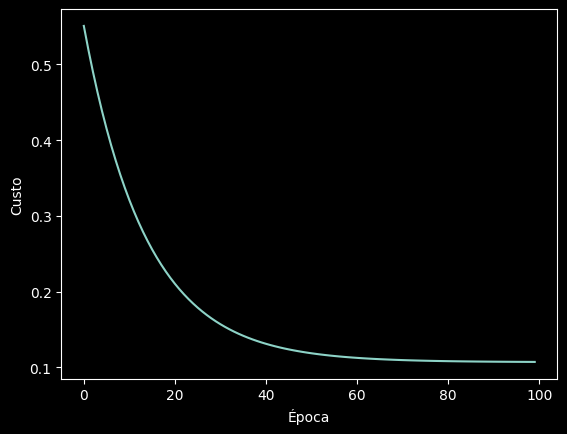

In [49]:
plt.plot(GD.cost_per_epoch)
plt.xlabel("Época")
plt.ylabel("Custo")
plt.show()

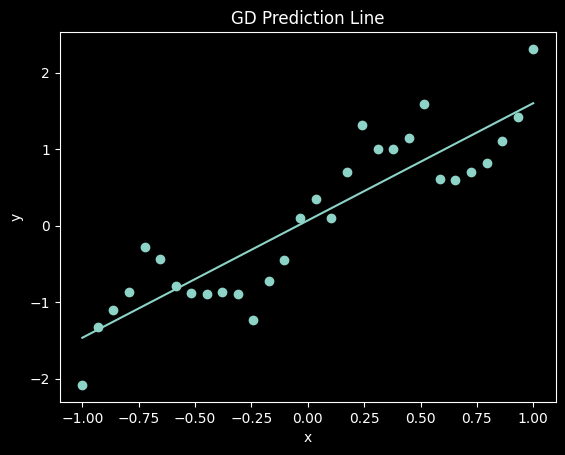

In [50]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], GD.predict(df['x']))
plt.xlabel('x')
plt.ylabel('y')
plt.title('GD Prediction Line')
plt.show()

## Stochastic Gradient Descent

In [ ]:
class StochasticGradientDescent:
    def __init__(self, alpha=0.1, epochs=10, output_dir=None):
        self.alpha = alpha
        self.epochs = epochs
        self.w0 = 0
        self.w1 = 0
        self.cost_per_iteration = []
        self.output_dir = output_dir

    def fit(self, x, y, plot=False):
        self.w0 = 0
        self.w1 = 0
        count = 0

        for epoch in range(self.epochs):
            error_list = []
            x, y = shuffle(x, y)

            for i in range(len(x)):

                y_hat = self.w0 + self.w1 * x[i]
                error = y[i] - y_hat
                error_list.append(error)

                self.w0 += self.alpha * error
                self.w1 += self.alpha * error * x[i]

                mse = sum([error**2 for error in error_list]) / \
                    (2 * len(error_list))
                self.cost_per_iteration.append(mse)

                if plot:
                    plot_x = [x.min(), x.max()]
                    plot_y = [self.w0 + self.w1 * x for x in plot_x]
                    plt.plot(plot_x, plot_y,
                             label=f'sgd_iteration_{count + 1}')
                    plt.scatter(x, y)
                    plt.xlabel('x')
                    plt.ylabel('y')
                    plt.legend()

                    if self.output_dir:

                        plt.savefig(os.path.join(
                            self.output_dir, f'sgd_iteration_{count + 1}.png'))
                        count += 1
                        plt.close()
                    else:
                        plt.show()
        return self.w0, self.w1

    def predict(self, x):
        return self.w0 + self.w1 * x

In [52]:
SGD = StochasticGradientDescent(alpha=0.1, epochs=5)

In [53]:
SGD.fit(df['x'], df['y'])

(np.float64(0.06935319487413572), np.float64(1.5916101250686177))

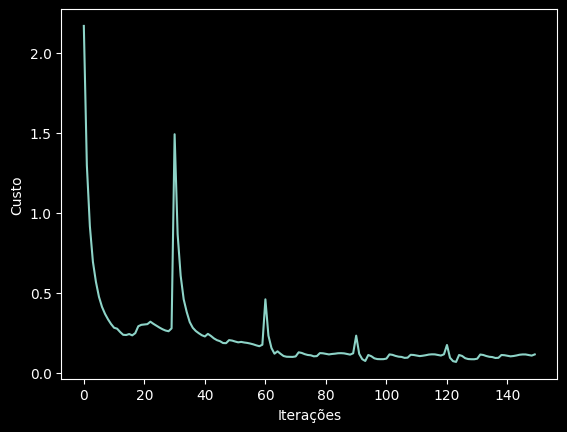

In [54]:
plt.plot(SGD.cost_per_iteration)
plt.xlabel("Iterações")
plt.ylabel("Custo")
plt.show()

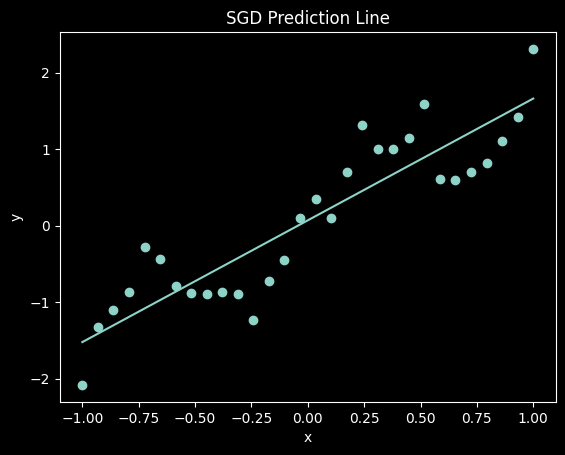

In [55]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], SGD.predict(df['x']))
plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD Prediction Line')
plt.show()

## Ordinary Least Squares

In [56]:
class OrdinaryLeastSquares:
    def __init__(self):
        self.w = []

    def fit(self, x, y):
        x = x.to_frame()
        x.insert(0, "x0", 1)
        x = x.values
        y = y.values

        squares_inv = np.linalg.inv(x.T @ x)
        self.w = squares_inv @ x.T @ y
        return self.w

    def predict(self, x):
        x = x.to_frame()
        x.insert(0, "x0", 1)
        x = x.values

        return x @ self.w

In [57]:
OLS = OrdinaryLeastSquares()

In [58]:
OLS.fit(df['x'], df['y'])

array([0.06761792, 1.57486517])

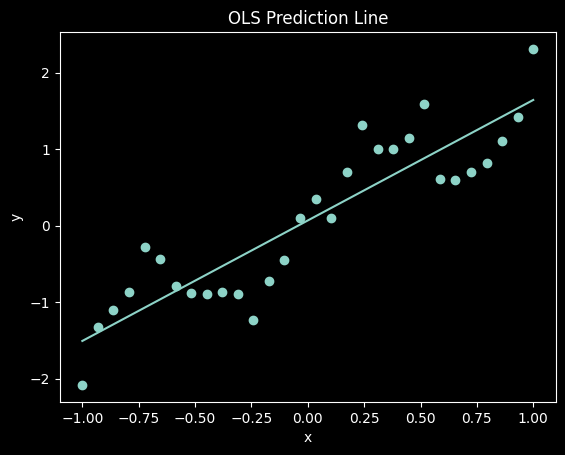

In [59]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], OLS.predict(df['x']))
plt.xlabel('x')
plt.ylabel('y')
plt.title('OLS Prediction Line')
plt.show()

# Fit Gifs

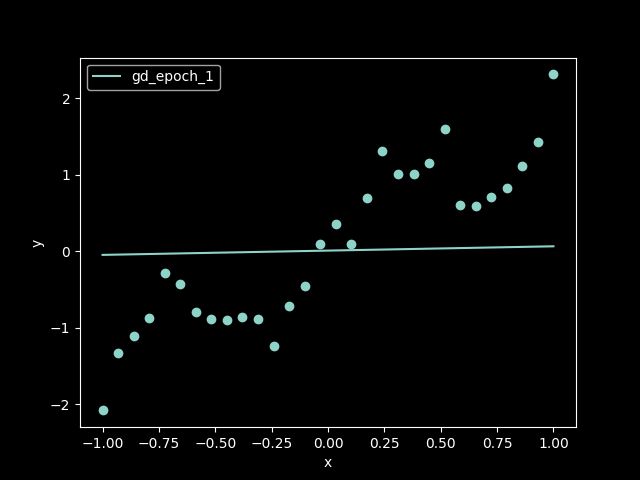

In [ ]:
display(Image(filename='images/gifs/gdgif.gif', format='gif'))

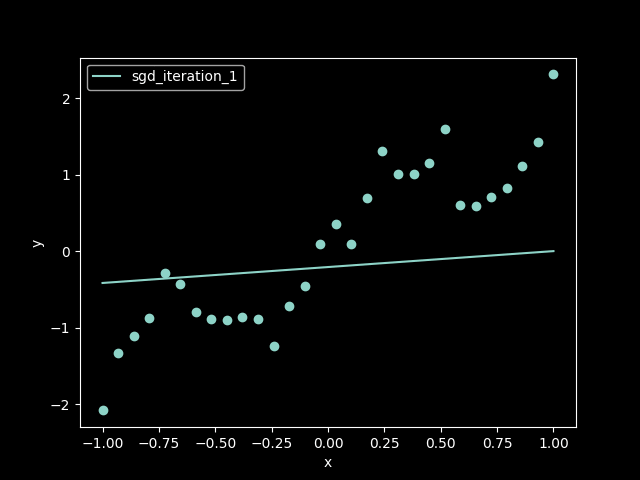

In [ ]:
display(Image(filename='images/gifs/sgdgif.gif', format='gif'))

## Plot generators

In [ ]:
# GD = GradientDescent(alpha=0.1, epochs=100, output_dir='images/gd')
# GD.fit(df['x'], df['y'], plot=True)

(np.float64(0.06761612861167202), np.float64(1.5330326325126253))

In [ ]:
# SGD = StochasticGradientDescent(alpha=0.1, epochs=5, output_dir='images/sgd')
# SGD.fit(df['x'], df['y'], plot=True)

(np.float64(0.06935319487413572), np.float64(1.5916101250686177))